# Trabalhando com arquivos JSON

Neste projeto, vamos acompanhar as falências corporativas na Polônia. Para isso, precisaremos obter dados que foram armazenados em um arquivo `JSON`, explorá-los e transformá-los em um DataFrame que usaremos para treinar nosso modelo.

In [13]:
import gzip
import json
import pandas as pd

# Preparando Dados

## Abrindo

A primeira coisa que precisamos fazer é acessar o arquivo que contém os dados de que precisamos.

### Exercício:
Abra uma janela do terminal e navegue até o diretório onde os dados para este projeto estão localizados.


In [3]:
!ls

poland-bankruptcy-data-2009.json.gz  poland-bankruptcy-data-2009-mvp-features.json.gz  sample_data


Como vimos em nossos outros projetos, os conjuntos de dados podem ser grandes ou pequenos, desorganizados ou limpos, e complexos ou fáceis de entender. Independentemente de como os dados se apresentam, eles precisam ser salvos em um arquivo em algum lugar, e quando esse arquivo fica muito grande, precisamos *comprimí-lo*. Arquivos comprimidos são mais fáceis de armazenar porque ocupam menos espaço. Se você já encontrou um arquivo `ZIP`, você já trabalhou com dados comprimidos.

O arquivo que estamos usando para este projeto está comprimido, então precisaremos usar uma ferramenta de arquivos chamada `gzip` para abri-lo.

### Exercício:
Na janela do terminal, localize o arquivo de dados para este projeto e descomprima-o.


In [6]:
%%bash
gzip -dkf /content/poland-bankruptcy-data-2009.json.gz

## Explorar

Agora que descomprimimos os dados, vamos dar uma olhada para ver o que temos.

### Exercício:
Na janela do terminal, examine as primeiras 10 linhas de `poland-bankruptcy-data-2009.json`.

In [8]:
%%bash
head /content/poland-bankruptcy-data-2009.json

{
    "schema": {
        "fields": [
            {
                "name": "company_id",
                "type": "integer"
            },
            {
                "name": "feat_1",
                "type": "number"


Isso se parece com alguma das estruturas de dados que vimos em projetos anteriores?

Como os dados estão organizados?


Chaves? Pares de chave-valor? Parece semelhante a um dicionário Python. É importante notar que JSON não é _exatamente_ o mesmo que um dicionário, mas muitos dos mesmos conceitos se aplicam. Vamos tentar ler o arquivo em um DataFrame e ver o que acontece.

### Exercício:
Carregue os dados em um DataFrame.


In [11]:
import pandas as pd
df = pd.read_json('/content/poland-bankruptcy-data-2009.json')
df.head()

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

Hmmm. Parece que algo deu errado, e vamos ter que consertar isso. Felizmente, temos uma mensagem de erro para nos ajudar a entender o que está acontecendo aqui:

<code><span>ValueError</span>: Mixing dicts with non-Series may lead to ambiguous ordering.</code>

O que devemos fazer? Esse erro parece sério, mas o mundo é grande e não podemos ser os primeiros a encontrar esse problema.

Quando você se deparar com um erro, copie a mensagem em um mecanismo de busca e veja o que aparece. Você encontrará muitos resultados. A internet tem muitos lugares para procurar soluções para problemas como este, e o Stack Overflow é um dos melhores.

Há três coisas a procurar ao navegar por soluções no Stack Overflow.

1. **Contexto:** Uma boa pergunta é específica; se você clicar nesse link, verá que a pessoa faz uma pergunta **específica**, fornece algumas informações relevantes sobre seu sistema operacional e hardware, e depois oferece o código que gerou o erro. Isso é importante, porque precisamos...
2. **Código Reproduzível:** Uma boa pergunta também inclui informações suficientes para que você possa reproduzir o problema por conta própria. Afinal, a única maneira de garantir que a solução realmente se aplica à sua situação é ver se o código na pergunta gera o erro com o qual você está tendo problemas! Neste caso, a pessoa incluiu não apenas o código que usou para obter o erro, mas a própria mensagem de erro. Isso seria útil por si só, mas como você está procurando uma solução real para o seu problema, você está realmente procurando por...
3. **Uma resposta:** Nem toda pergunta no Stack Overflow recebe resposta. Felizmente para nós, a que estamos analisando teve uma. Há uma grande marca verde ao lado da primeira solução, o que significa que a pessoa que fez a pergunta achou que essa solução era a melhor.

Vamos tentar e ver se funciona para nós também!

### Exercício:
Usando um gerenciador de contexto, abra o arquivo `poland-bankruptcy-data-2009.json` e carregue-o como um dicionário com o nome da variável `poland_data`.

In [12]:
# Open file and load JSON
import json

with open("/content/poland-bankruptcy-data-2009.json", "r") as read_file:
    poland_data = json.load(read_file)

print(type(poland_data))

<class 'dict'>


Certo! Agora que abrimos com sucesso nosso conjunto de dados, vamos dar uma olhada para ver o que temos, começando pelas chaves. Lembre-se de que as **chaves** em um dicionário são categorias de coisas em um conjunto de dados.

### Exercício:
Imprima as chaves de `poland_data`.

In [14]:
poland_data.keys()

dict_keys(['schema', 'data', 'metadata'])

`schema` nos informa como os dados estão estruturados, `metadata` nos diz de onde os dados vêm, e `data` é o próprio dado.

Agora vamos dar uma olhada nos valores. Lembre-se de que os **valores** em um dicionário são formas de descrever a variável que pertence a uma chave.

### Exercício:
Explore os valores associados às chaves em `poland_data`. O que cada um deles representa? Como as informações associadas à chave `"data"` estão organizadas?

In [ ]:
# Continue Exploring `poland_data`
# poland_data["metadata"]
# poland_data["schema"].keys()
poland_data["data"][0]

Esse conjunto de dados inclui todas as informações que precisamos para descobrir se uma empresa polonesa faliu ou não em 2009. Há uma série de características incluídas no conjunto de dados, cada uma das quais corresponde a algum elemento do balanço patrimonial de uma empresa. Você pode explorar as características olhando o dicionário de dados.

O mais importante é que também sabemos se a empresa faliu ou não. Essa é a última chave-valor.

Agora que sabemos quais dados temos para cada empresa, vamos dar uma olhada em quantas empresas existem.

### Exercício:
Calcule o número de empresas incluídas no conjunto de dados.

In [26]:
# Calculate number of companies
len(poland_data["data"])

9977

E então vamos ver quantas características foram incluídas para uma das empresas.

###Exercício:
Calcule o número de características associadas a `"company_1"`.

In [27]:
# Calculate number of features
len(poland_data["data"][0])

66

Como estamos lidando com dados armazenados em um arquivo JSON, que é comum para dados semi-estruturados, não podemos assumir que todas as empresas têm as mesmas características.

Então, vamos verificar!

### Exercício:
Percorra as empresas em `poland_data["data"]` e verifique se todas elas têm o mesmo número de características.

In [29]:
# Iterate through companies
for company in poland_data["data"]:
  if len(company) != 66:
    print(company)

Parece que sim!

Vamos juntar tudo isso. Primeiro, abra o conjunto de dados comprimido e carregue-o diretamente em um dicionário.

### Exercício:
Usando um gerenciador de contexto, abra o arquivo `poland-bankruptcy-data-2009.json.gz` e carregue-o como um dicionário com o nome da variável `poland_data_gz`.

In [30]:
# Open compressed file and load contents
with gzip.open("/content/poland-bankruptcy-data-2009.json.gz", "r") as read_file:
    poland_data_gz = json.load(read_file)


print(type(poland_data_gz))

<class 'dict'>


Como agora temos duas versões do conjunto de dados — uma comprimida e uma descomprimida — precisamos compará-las para garantir que sejam iguais.

### Exercício:
Explore `poland_data_gz` para confirmar que ele contém os mesmos dados que `data`, no mesmo formato.

In [33]:
# Explore `poland_data_gz`
poland_data_gz["metadata"]
# poland_data_gz["schema"].keys()
# poland_data_gz["data"][0]

{'title': 'Ensemble Boosted Trees with Synthetic Features Generation in Application to Bankruptcy Prediction',
 'authors': 'Zieba, M., Tomczak, S. K., & Tomczak, J. M.',
 'journal': 'Expert Systems with Applications',
 'publicationYear': 2016,
 'dataYear': 2009,
 'articleLink': 'doi:10.1016/j.eswa.2016.04.001',
 'datasetLink': 'https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'}

Parece bom! Agora que temos um conjunto de dados descomprimido, podemos transformá-lo em um DataFrame usando `pandas`.

### Exercício:
Crie um DataFrame `df` que contenha todas as empresas no conjunto de dados, indexadas por `"company_id"`. Lembre-se dos princípios de *dados organizados* e certifique-se de que seu DataFrame tenha a forma `(9977, 65)`.

In [34]:
df = pd.DataFrame().from_dict(poland_data_gz["data"]).set_index("company_id")
print(df.shape)
df.head()

(9977, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


## Importação

Agora que temos tudo configurado da maneira que precisamos, vamos combinar todas essas etapas em uma única função que irá descomprimir o arquivo, carregá-lo em um DataFrame e nos retorná-lo como algo que podemos usar.

### Exercício:
Crie uma função `wrangle` que aceita o nome de um arquivo comprimido como entrada e retorna um DataFrame organizado. Depois de confirmar que sua função está funcionando conforme o esperado, envie-a para o avaliador.

In [35]:
def wrangle(filename):
    # Descompactar e ler arquivo json
    with gzip.open(filename, "r") as read_file:
      data = json.load(read_file)

    # Transformar em dataframe com o set index como "company_id"
    df = pd.DataFrame().from_dict(data["data"]).set_index("company_id")

    return df

In [ ]:
df = wrangle('/content/poland-bankruptcy-data-2009.json.gz')
print(df.shape)
df.head()

# Dados Desbalanceados

No ultimo capítulo, preparamos os dados.

Nesta lição, vamos explorar algumas das características do conjunto de dados, usar visualizações para nos ajudar a entender essas características e desenvolver um modelo que resolva o problema de dados desbalanceados através de subamostragem e superamostragem.

In [37]:
import gzip
import json
import pickle
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Preparando Dados

## Importação

Como sempre, precisamos começar trazendo nossos dados para o projeto, e a função que desenvolvemos no módulo anterior é exatamente o que precisamos.

### Exercício:
Complete a função `wrangle` abaixo usando o código que você desenvolveu na última lição.

Em seguida, use-a para importar `poland-bankruptcy-data-2009.json.gz` para o DataFrame `df`.

In [38]:
def wrangle(filename):
    # Descompactar e ler arquivo json
    with gzip.open(filename, "r") as read_file:
      data = json.load(read_file)

    # Transformar em dataframe com o set index como "company_id"
    df = pd.DataFrame().from_dict(data["data"]).set_index("company_id")

    return df

In [39]:
df = wrangle('/content/poland-bankruptcy-data-2009.json.gz')
print(df.shape)
df.head()

(9977, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


## Explorar

Vamos fazer uma pausa para relembrar o que há neste conjunto de dados.

Na última lição, notamos que os dados estavam armazenados em um arquivo JSON (semelhante a um dicionário Python) e exploramos os pares de chave-valor. Desta vez, vamos analisar quais são realmente os valores nesses pares.

### Exercício:
Use o método `info` para explorar `df`. Que tipo de características este conjunto de dados possui? Qual coluna é o alvo? Existem colunas com valores ausentes que precisaremos abordar?


In [41]:
# Inspect DataFrame
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


Essa é uma informação sólida. Sabemos que todas as nossas características são numéricas e que temos dados ausentes. Mas, como sempre, é uma boa ideia fazer algumas visualizações para ver se há tendências ou ideias interessantes que devemos considerar enquanto trabalhamos. Primeiro, vamos dar uma olhada em quantas empresas estão em falência e quantas não estão.

### Exercício:
Crie um gráfico de barras dos valores contados para a coluna "bankrupt". Você quer calcular as frequências relativas das classes, não a contagem bruta, então certifique-se de definir o argumento normalize como True.

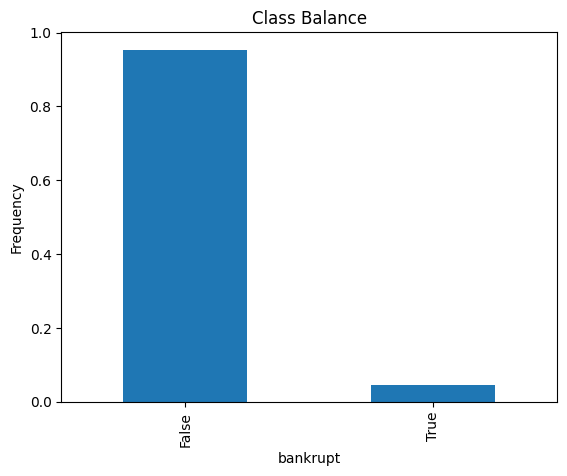

In [44]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(
    kind='bar',
    xlabel="bankrupt",
    ylabel="Frequency",
    title="Class Balance"
    );

Isso é uma boa notícia para a economia da Polônia! Como parece que a maioria das empresas em nosso conjunto de dados está se saindo bem, vamos aprofundar um pouco mais. No entanto, isso também nos mostra que temos um conjunto de dados desbalanceado, onde nossa classe majoritária é muito maior do que nossa classe minoritária.

Na última lição, vimos que havia 64 características de cada empresa, cada uma das quais tinha algum tipo de valor numérico. Pode ser útil entender onde os valores de uma dessas características estão agrupados, então vamos fazer um boxplot para ver como os valores em "feat_27" estão distribuídos.

### Exercício:
Use o Seaborn para criar um boxplot que mostre as distribuições da coluna `"feat_27"` para ambos os grupos na coluna `"bankrupt"`. Lembre-se de rotular seus eixos.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


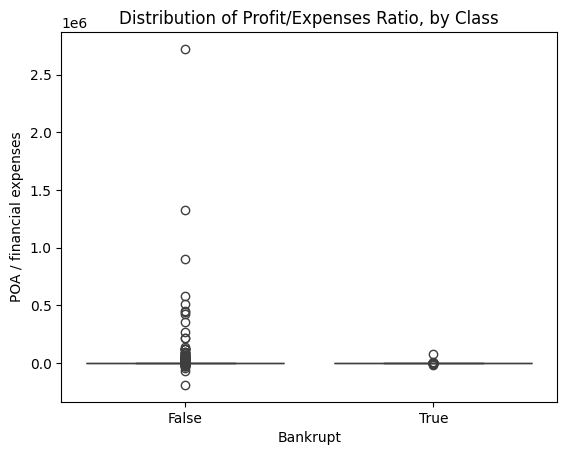

In [45]:
# Create boxplot
sns.boxplot(data=df,x="bankrupt",y="feat_27")
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

Por que isso parece tão estranho? Lembre-se de que os boxplots existem para nos ajudar a ver os quartis em um conjunto de dados, e este não faz isso de fato. Vamos verificar a distribuição de `"feat_27"` para ver se conseguimos entender o que está acontecendo aqui.

### Exercício:
Use o método `describe` na coluna `"feat_27"`. O que você pode dizer sobre a distribuição dos dados com base na média e na mediana?

In [47]:
# Summary statistics for `feat_27`
df["feat_27"].describe().apply("{0:,.0f}".format)

,feat_27
count,"9,312"
mean,"1,206"
std,"35,477"
min,"-190,130"
25%,0
50%,1
75%,5
max,"2,723,000"


Hmm. Note que a mediana está em torno de 1, mas a média está acima de 1000. Isso sugere que essa característica está assimétrica para a direita. Vamos fazer um histograma para ver como a distribuição realmente se parece.

### Exercício:
Crie um histograma de `"feat_27"`. Certifique-se de rotular o eixo x como `"POA / despesas financeiras"`, o eixo y como `"Contagem"` e usar o título `"Distribuição da Relação Lucro/Despesas"`.

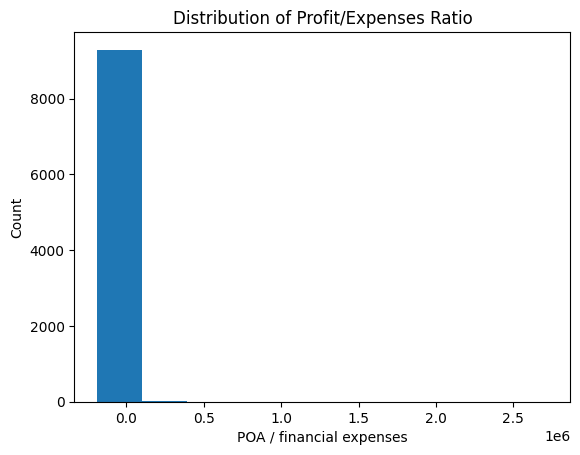

In [48]:
# Plot histogram of `feat_27`
plt.hist(df["feat_27"])
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

Aha! Nós vimos isso nos números e agora vemos isso no histograma. Os dados estão muito assimétricos. Portanto, para criar um boxplot útil, precisamos fazer um corte nos dados.

### Exercício:
Recrie o boxplot que você fez acima, desta vez usando apenas os valores de `"feat_27"` que estão entre os quantis `0.1` e `0.9` para a coluna.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


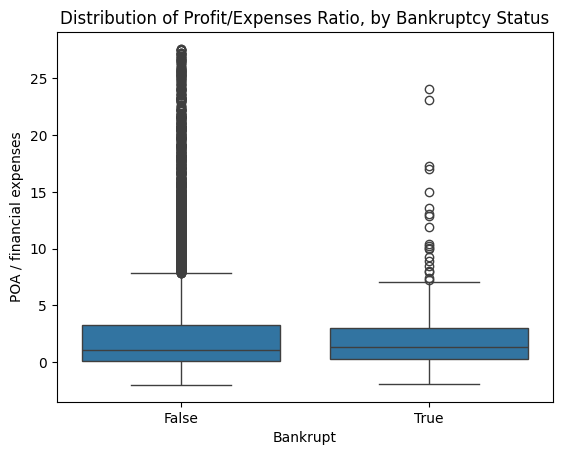

In [49]:
# Create clipped boxplot
low, high = df["feat_27"].quantile([0.1,0.9])
mask_q = df["feat_27"].between(low,high)

sns.boxplot(data=df[mask_q], x="bankrupt", y="feat_27")
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

Isso faz muito mais sentido. Vamos dar uma olhada em algumas das outras características do conjunto de dados para ver o que mais está disponível.

__Mais contexto sobre__ `"feat_27"`: __*Lucro em atividades operacionais*__ é o lucro que uma empresa obtém através de suas operações "normais".

Por exemplo, uma montadora lucra com a venda de seus carros. No entanto, uma empresa pode ter outras formas de lucro, como investimentos financeiros. Assim, o *__lucro total da empresa__* pode ser positivo mesmo quando seu lucro em atividades operacionais é negativo.

*__Despesas financeiras__* incluem coisas como juros devidos sobre empréstimos e não incluem despesas "normais" (como o dinheiro que uma montadora gasta em matérias-primas para fabricar carros).

### Exercício:
Repita a exploração que você acabou de fazer para `"feat_27"` em duas outras características do conjunto de dados. Elas mostram a mesma distribuição assimétrica? Existem grandes diferenças entre empresas falidas e solventes?

In [ ]:
# Explore another feature

# Create boxplot

# Feat 26
sns.boxplot(data=df, x="bankrupt", y="feat_26")
# Feat 34
sns.boxplot(data=df, x="bankrupt", y="feat_34")

# Summary statistics for `feat_`

# Feat 26
df["feat_26"].describe()
# Feat 34
df["feat_34"].describe()

# Plot histogram

# Feat 26
plt.hist(df["feat_26"])
# Feat 34
plt.hist(df["feat_34"])

# Create clipped boxplot

# Feat 26
low, high = df["feat_26"].quantile([0.1,0.9])
mask_q = df["feat_26"].between(low,high)
sns.boxplot(data=df[mask_q], x="bankrupt", y="feat_26")

# Feat 34
low, high = df["feat_34"].quantile([0.1,0.9])
mask_q = df["feat_34"].between(low,high)
sns.boxplot(data=df[mask_q], x="bankrupt", y="feat_34")

Analisando outras características, podemos ver que também estão assimétricas. Isso será importante para lembrarmos ao decidirmos que tipo de modelo queremos usar.

Outra consideração importante para a seleção do modelo é verificar se há problemas de multicolinearidade em nosso modelo. Vamos conferir.

### Exercício:
Trace um mapa de calor de correlação das características em `df`. Como `"bankrupt"` será seu alvo, você não precisa incluí-lo em seu mapa de calor.

In [ ]:
corr = ...


Então, o que aprendemos com esta análise exploratória de dados?

Primeiro, nossos dados estão desequilibrados. Isso é algo que precisamos abordar na preparação dos dados.

Em segundo lugar, muitas das nossas características têm valores ausentes que precisaremos imputar. E, como as características estão altamente distorcidas, a melhor estratégia de imputação provavelmente é a mediana, não a média.

Por fim, temos problemas de autocorrelação, o que significa que devemos evitar modelos lineares e tentar um modelo baseado em árvore em vez disso.

## Dividir

Então, vamos começar a construir esse modelo. Se você precisar de um lembrete sobre como e por que dividimos os dados nessas situações, dê uma olhada no módulo de Séries Temporais.

### Exercício:
Crie sua matriz de recursos `X` e vetor alvo `y`. Seu alvo é `"bankrupt"`.

In [ ]:
target = "bankrupt"
X = ...
y = ...

print("X shape:", X.shape)
print("y shape:", y.shape)

Para garantir que nosso modelo possa generalizar, precisamos reservar um conjunto de teste que usaremos para avaliar nosso modelo uma vez que ele esteja treinado.

### Exercício:
Divida seus dados (`X` e `y`) em conjuntos de treinamento e teste usando uma divisão aleatória de treino-teste. Seu conjunto de validação deve ser 20% do total dos seus dados. E não se esqueça de definir um `random_state` para garantir a reprodutibilidade.

In [ ]:
X_train, X_test, y_train, y_test = ...

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Observe que, se quisermos ajustar quaisquer hiperparâmetros para o nosso modelo, faríamos outra divisão aqui, dividindo ainda mais o conjunto de treinamento em conjuntos de treinamento e validação. No entanto, vamos deixar os hiperparâmetros para a próxima lição, então não há necessidade de fazer a divisão extra agora.

## Resample

Agora que dividimos nossos dados em conjuntos de treinamento e validação, podemos abordar o desequilíbrio de classes que vimos durante nossa análise exploratória. Uma estratégia é reamostrar os dados de treinamento.

Existem várias maneiras de fazer isso, então vamos começar com a subamostragem.

Crie uma nova matriz de características `X_train_under` e um vetor de alvo `y_train_under` realizando a `under_sampler` aleatória nos seus dados de treinamento.

In [ ]:
under_sampler = ...
X_train_under, y_train_under = ...
print(X_train_under.shape)
X_train_under.head()

__Nota:__ Dependendo do estado aleatório que você definiu acima, você pode obter uma forma diferente para `X_train_under`. Não se preocupe, isso é normal!

E então faremos o **over-sampling**.

### Exercício:
Crie uma nova matriz de características `X_train_over` e um vetor alvo `y_train_over` realizando o **over-sampling** aleatório nos seus dados de treinamento.

In [ ]:
over_sampler = ...
X_train_over, y_train_over = ...
print(X_train_over.shape)
X_train_over.head()

# Construindo Model

## Baseline

Como sempre, precisamos estabelecer a linha de base para o nosso modelo. Como se trata de um problema de classificação, usaremos a **pontuação de precisão**.

### Exercício:
Calcule a pontuação de precisão básica para o seu modelo.

In [ ]:
acc_baseline = ...
print("Baseline Accuracy:", round(acc_baseline, 4))

Observe aqui que, devido ao fato de nossas classes estarem desequilibradas, a precisão básica é muito alta. Devemos ter isso em mente porque, mesmo que nosso modelo treinado obtenha uma alta pontuação de precisão de validação, isso não significa que ele seja realmente *__bom.__*

## Iterar

Agora que temos uma linha de base, vamos construir um modelo para ver se conseguimos superá-la.

### Exercício:
Crie três modelos idênticos: `model_reg`, `model_under` e `model_over`. Todos eles devem usar um `SimpleImputer` seguido de um `DecisionTreeClassifier`. Treine `model_reg` usando os dados de treinamento não alterados. Para `model_under`, use os dados subamostrados. Para `model_over`, use os dados superamostrados.

In [ ]:
# Fit on `X_train`, `y_train`
model_reg = ...
model_reg.fit(..., ...)

# Fit on `X_train_under`, `y_train_under`
model_under = ...
model_under.fit(..., ...)

# Fit on `X_train_over`, `y_train_over`
model_over = ...
model_over.fit(..., ...)

## Avaliar

Como fazer?

### Exercício:
Calcule a acurácia de treinamento e teste para seus três modelos.

In [ ]:
for m in [model_reg, model_under, model_over]:
    acc_train = ...
    acc_test = ...

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Como mencionamos anteriormente, "boas" pontuações de acurácia não dizem muito sobre o desempenho do modelo ao lidar com dados desbalanceados.

Portanto, em vez de observar o que o modelo acertou ou errou, vamos ver como suas previsões diferem para as duas classes no conjunto de dados.

### Exercício:
Plote uma matriz de confusão que mostre como seu melhor modelo se comporta em seu conjunto de validação.

In [ ]:
# Plot confusion matrix


Nesta lição, não fizemos nenhum ajuste de hiperparâmetros, mas será útil na próxima lição saber qual é a profundidade da árvore `model_over`.

### Exercício:
Determine a profundidade da árvore de decisão em `model_over`.

In [ ]:
depth = ...
print(depth)

# Comunicar Resultados

Agora que temos um modelo razoável, vamos representar graficamente a importância de cada recurso.

### Exercício:
Crie um gráfico de barras horizontal com os 15 recursos mais importantes para `model_over`. Certifique-se de rotular o eixo x como `"Importância Gini"`.

In [ ]:
# Get importances
importances = ...

# Put importances into a Series
feat_imp = ...

# Plot series

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

Lá está nosso velho amigo `"feat_27"` perto do topo, junto com as características 34 e 26. É hora de compartilhar nossas descobertas.

Às vezes, a comunicação significa compartilhar uma visualização. Outras vezes, significa compartilhar o modelo real que você criou para que colegas possam usá-lo em novos dados ou implantar seu modelo em produção. Primeiro passo em direção à produção: salvar seu modelo.

### Exercício:
Usando um gerenciador de contexto, salve seu modelo de melhor desempenho em um arquivo chamado `"model-5-2.pkl"`.

In [ ]:
# Save your model as `"model-5-2.pkl"`


### Exercício:
Certifique-se de que você salvou seu modelo corretamente ao carregar `"model-5-2.pkl"` e atribuí-lo à variável `loaded_model`. Depois de estar satisfeito com o resultado, execute a última célula para enviar seu modelo ao avaliador.

In [ ]:
# Load `"model-5-2.pkl"`

print(loaded_model)